# Investigate CLIP text embeddings

run the following script to generate the embeddings of positive and negative samples.  

A positive sample refers to a pair of (image, text) where the content of the image corresponds to the text, while the negative sample is the one that does not match.

The distance to see if the image and text match is computed by the cosine distance (dot product) between the embeddings of the image and text.

Then, the sample mean of the distance is computed for each batch. The distance will be saved in 'clip_embeddings.csv' with positive column and negative column. Each line is a batch through the CLIP model.  


In [1]:
# sbatch /user/home/pu22650/clip-binding/Investigate_CLIP_embeddings.py

## Lib

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

## Plot

To see wether CLIP can distinguish the positive and negative samples, we plot the distribution of positive and negative samples mean. and fit the pdf of them.

mean value of negative distribution: 20.464111832832174 standard error of negative distribution: 0.15975378609633525
mean value of positive distribution: 23.654315595047912 standard error of positive distribution: 0.20366255676372036


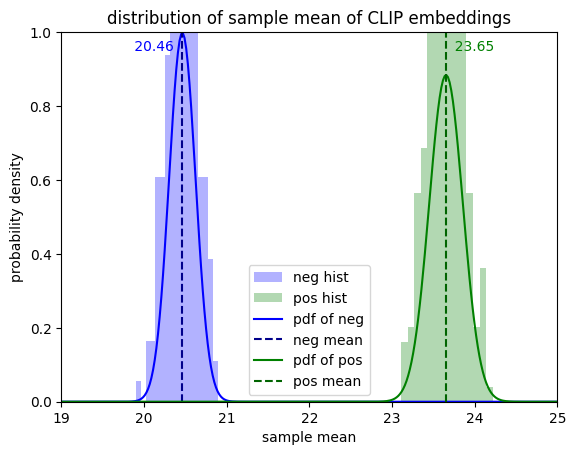

In [13]:

def normal_dist(x, mu, sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma)

df = pd.read_csv('clip_embeddings.csv')
X = np.linspace(15, 25, 500)
fig, ax = plt.subplots()
ax.set_title("distribution of sample mean of CLIP embeddings")
hist_neg = ax.hist(df['neg_mean'], bins='auto', density=True, label='neg hist', alpha = 0.3, color=mcolors.CSS4_COLORS['blue'])
hist_pos = ax.hist(df['pos_mean'], bins='auto', density=True, label='pos hist', alpha = 0.3, color=mcolors.CSS4_COLORS['green'])
neg_dist = stats.rv_histogram(hist_neg[:2])
pos_dist = stats.rv_histogram(hist_pos[:2])

ax.plot(X, normal_dist(X, neg_dist.mean(), neg_dist.std()), label='pdf of neg', color=mcolors.CSS4_COLORS['blue'])
ax.vlines(neg_dist.mean(), 0, 3, colors=mcolors.CSS4_COLORS['darkblue'], label='neg mean', linestyle='--')
print("mean value of negative distribution:", neg_dist.mean(), "standard error of negative distribution:", neg_dist.std())
plt.text(neg_dist.mean(), .95, f' {neg_dist.mean():.2f}  ', ha='right', color=mcolors.CSS4_COLORS['blue']) 

ax.plot(X, normal_dist(X, pos_dist.mean(), pos_dist.std()), label='pdf of pos', color=mcolors.CSS4_COLORS['green'])
ax.vlines(pos_dist.mean(), 0, 3, colors=mcolors.CSS4_COLORS['darkgreen'], label='pos mean', linestyle='--')
print("mean value of positive distribution:", pos_dist.mean(), "standard error of positive distribution:", pos_dist.std())
plt.text(pos_dist.mean(), .95, f'  {pos_dist.mean():.2f} ', ha='left', color=mcolors.CSS4_COLORS['green']) 
ax.legend()
ax.set_xlabel('sample mean')
ax.set_ylabel('probability density')
ax.set_xlim(19, 25)
ax.set_ylim(0, 1)
fig.show()

In [14]:
fig.savefig('gen_64batchsize_20.464111832832174_0.15975378609633525_23.654315595047912_0.20366255676372036.pdf', bbox_inches='tight')

## Hypothesis testing

To test whether the average distance of positive population is greater than negative population, we use the one-tailed t-test.
H0: µ1 = µ2 (the two population means are equal)   
H1: µ1 > µ2 (positive mean value is greater than negative mean value)  
we set the significance level α at 0.05

In [4]:
stats.ttest_rel(a=df['pos_mean'], b=df['neg_mean'], alternative='greater')

Ttest_relResult(statistic=-112.28455147503507, pvalue=1.0)

Since the p-value of the test (0) is less than .05, we reject the null hypothesis.   
=> positive mean value is greater than negative mean value